# Medical Data Visualizer

<div class="alert alert-block alert-info">
<b>Description:</b><br> This Notebook shows some analysis I did on medical data as part of the final project of the freecodecamp Python Data Analytics course.
</div>

***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
 #convert height from cm to m
df['height_m'] = df['height']/100

# calculate BMI
df['BMI'] = df['weight'] / (df['height_m']**2)

# add overweight column
df['overweight'] = (df['BMI'] > 25).astype(int)

# drop temporary columns
df.drop(['height_m', 'BMI'], axis=1, inplace=True)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.replace({
    "cholesterol": { 
        1: 0, 
        2: 1, 
        3: 1
    },
    "gluc": {
        1: 0, 
        2: 1, 
        3: 1
    }
}, inplace=True)

In [3]:
# Draw Categorical Plot
def draw_cat_plot():
    # Split the data by 'cardio'
    df_cat = pd.melt(df, id_vars=['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio'], var_name='variable', value_name='value')
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()

    # Rename the 'size' column to 'total'
    df_cat = df_cat.rename(columns={'size': 'total'})

    # Draw the catplot
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

  # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [4]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, ax=ax)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return ax

## In useage

In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


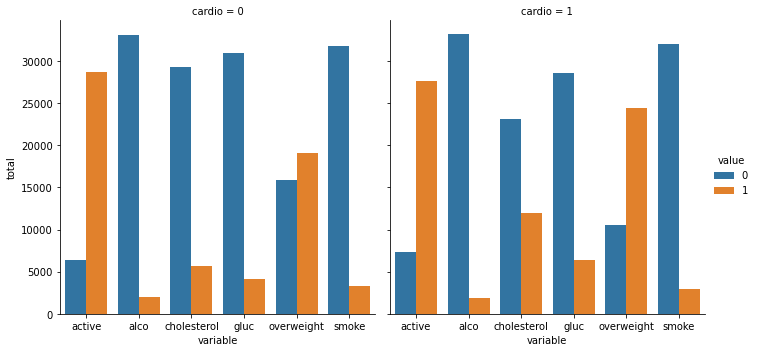

In [6]:
    df_cat = pd.melt(df, id_vars=['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio'], var_name='variable', value_name='value')
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()

    # Rename the 'size' column to 'total'
    df_cat = df_cat.rename(columns={'size': 'total'})

    # Draw the catplot
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

<AxesSubplot:>

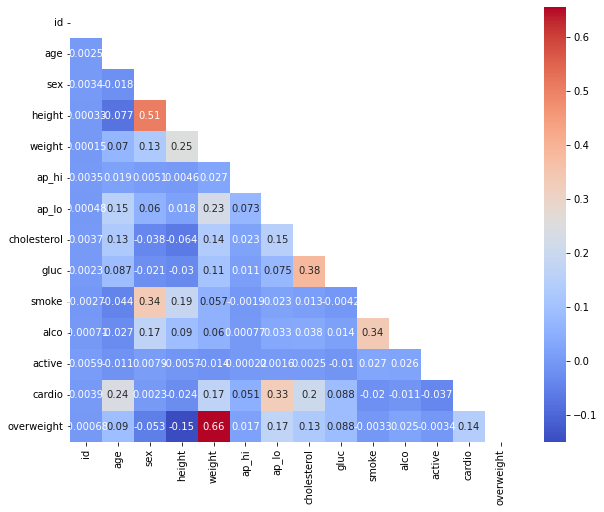

In [7]:
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, ax=ax)